<a href="https://colab.research.google.com/github/yuvashree2106/Batch-12/blob/main/ai_healthcare_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('patient_input_data.csv')
df.head()


,name,age,gender,blood_pressure,cholesterol,glucose_level,bmi,chest_pain,family_history_diabetes
0,Yuvashree.A,20,0,200,300,130,18.5,1,1
1,Arun.R.S,52,1,180,250,400,19.0,0,1
2,Vasanthi.A,45,0,188,400,300,30.0,1,1
3,Harishankar.A,18,1,172,400,260,20.0,0,1


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
def handle_missing_values(df):
    """Handles missing values in the DataFrame.

    Args:
        df: The input DataFrame.

    Returns:
        DataFrame: The DataFrame with missing values handled.
    """

    # 1. Identify missing values:
    print("Missing values per column:\n", df.isnull().sum())

    # 2. Imputation options:
    # a) Replace with mean (for numerical features):
    numerical_features = ['age', 'blood_pressure', 'cholesterol', 'glucose_level', 'bmi']
    for feature in numerical_features:
        df[feature].fillna(df[feature].mean(), inplace=True)

    # b) Replace with mode (for categorical features):
    categorical_features = ['gender', 'chest_pain', 'family_history_diabetes']
    for feature in categorical_features:
        df[feature].fillna(df[feature].mode()[0], inplace=True)

    # 3. Verify if any missing values remain:
    print("\nMissing values after handling:\n", df.isnull().sum())

    return df

In [ ]:
import pandas as pd

def remove_duplicates(df, subset=None, keep='first'):
    """Removes duplicate records from the DataFrame.

    Args:
        df: The input DataFrame.
        subset: Columns to consider for identifying duplicates (optional).
        keep: {'first', 'last', False}, default 'first'
            Determines which duplicates (if any) to keep.
            - 'first' : Drop duplicates except for the first occurrence.
            - 'last' : Drop duplicates except for the last occurrence.
            - False : Drop all duplicates.

    Returns:
        DataFrame: The DataFrame with duplicates removed.
    """

    # Remove duplicates based on specified columns (or all columns if None)
    df_no_duplicates = df.drop_duplicates(subset=subset, keep=keep)

    # Check if any duplicates were removed
    if df.shape[0] == df_no_duplicates.shape[0]:
        print("No duplicates found")

    # Reset index if needed
    df_no_duplicates = df_no_duplicates.reset_index(drop=True)

    return df_no_duplicates

# Example usage:
# df_cleaned = remove_duplicates(df, subset=['name', 'age'], keep='first')
# print(df_cleaned)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('patient_input_data.csv')  # Replace 'your_dataset.csv' with your file name
def detect_outliers_iqr(data, column):
    """Detects outliers in a specified column using the IQR method.

    Args:
        data: The DataFrame containing the data.
        column: The name of the column to check for outliers.

    Returns:
        A list of indices corresponding to outlier values.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()
    return outliers

# Example usage:
outliers_age = detect_outliers_iqr(df, 'age')
print(f"Outliers in 'age': {outliers_age}")
df_cleaned = df.drop(outliers_age, axis=0)  # Remove rows with outliers in 'age'
def cap_outliers(data, column, lower_percentile=5, upper_percentile=95):
    """Caps outliers to specified percentiles."""
    lower_limit = data[column].quantile(lower_percentile / 100)
    upper_limit = data[column].quantile(upper_percentile / 100)
    data[column] = np.clip(data[column], lower_limit, upper_limit)
    return data

df_capped = cap_outliers(df, 'age') # This line was incorrectly indented

Outliers in 'age': []


In [ ]:
import pandas as pd
df.dtypes
df['age'] = df['age'].astype(int)
df['blood_pressure'] = pd.to_numeric(df['blood_pressure'], errors='coerce')
# Check if 'date_column' exists before converting to datetime
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')  # Handle potential errors in date format
else:
    print("Warning: 'date_column' not found in the DataFrame.")
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV data
df = pd.read_csv('patient_input_data.csv')

# Perform data cleaning and preprocessing steps here
# ... (handle_missing_values, remove_duplicates, detect_outliers_iqr, cap_outliers, type conversions) ...

# Perform one-hot encoding immediately after preprocessing
# Perform one-hot encoding on 'chest_pain'
chest_pain_dummies = pd.get_dummies(df['chest_pain'], prefix='chest_pain')
df = pd.concat([df, chest_pain_dummies], axis=1)
df = df.drop('chest_pain', axis=1)

# Perform one-hot encoding on 'family_history_diabetes'
family_history_dummies = pd.get_dummies(df['family_history_diabetes'], prefix='family_history')
df = pd.concat([df, family_history_dummies], axis=1)
df = df.drop('family_history_diabetes', axis=1)


In [ ]:


from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame after all the preprocessing steps

# Identify numerical features to normalize
numerical_features_to_normalize = ['age', 'blood_pressure', 'cholesterol', 'glucose_level', 'bmi']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical features
df[numerical_features_to_normalize] = scaler.fit_transform(df[numerical_features_to_normalize])


🚀 Generating synthetic training data...
✅ Synthetic data saved as 'synthetic_patient_data.csv'

🚀 Training disease prediction models...
✅ Diabetes model accuracy: 0.54
✅ Heart disease model accuracy: 0.47
✅ Models saved as 'diabetes_model.pkl' and 'heart_disease_model.pkl'

🩺 Enter patient details:
Patient Name: Yuvashree.A
Age (in years): 20
Gender (1 = Male, 0 = Female): 0
Blood Pressure (in mmHg): 188
Cholesterol (in mg/dL): 300
Glucose Level (in mg/dL): 200
BMI (Body Mass Index): 18.5
Chest Pain (1 = Yes, 0 = No): 0
Family History of Diabetes (1 = Yes, 0 = No): 1
✅ Patient data saved to 'patient_input_data.csv'

Do you want to add another patient? (y/n): y

🩺 Enter patient details:
Patient Name: Arun.R.S
Age (in years): 52
Gender (1 = Male, 0 = Female): 1
Blood Pressure (in mmHg): 180
Cholesterol (in mg/dL): 300
Glucose Level (in mg/dL): 280
BMI (Body Mass Index): 19
Chest Pain (1 = Yes, 0 = No): 0
Family History of Diabetes (1 = Yes, 0 = No): 1
✅ Patient data saved to 'patient_inp

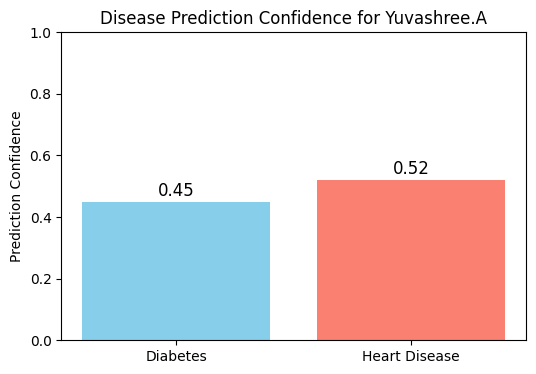

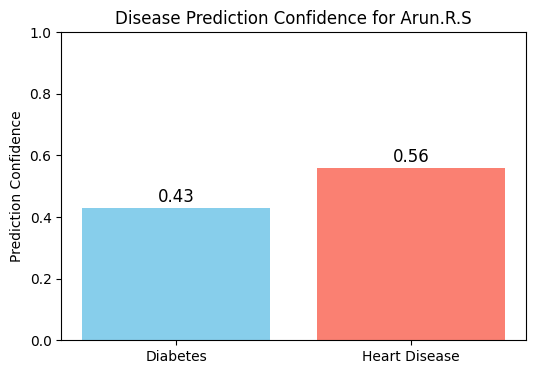

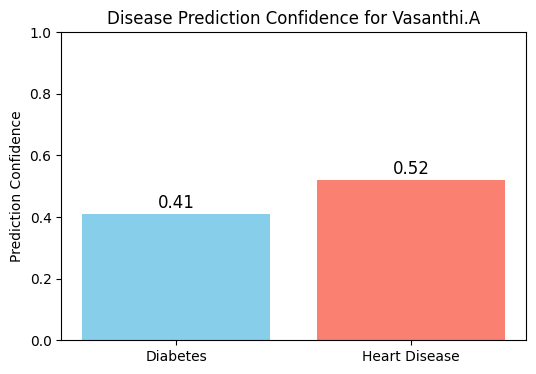

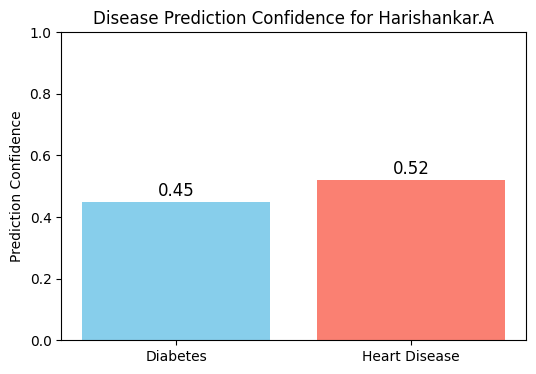

In [1]:
# multi_disease_prediction_system.py

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
import matplotlib.pyplot as plt   # 📊 NEW — for visualization

# ======= 1️⃣ Generate synthetic training data =======
def generate_synthetic_data(n_samples=1000):
    X, _ = make_classification(n_samples=n_samples, n_features=8,
                                n_informative=6, n_redundant=0,
                                n_classes=2, random_state=42)

    _, y_diabetes = make_classification(n_samples=n_samples, n_features=2,
                                         n_informative=2, n_redundant=0,
                                         n_classes=2, random_state=1)

    _, y_heart = make_classification(n_samples=n_samples, n_features=2,
                                      n_informative=2, n_redundant=0,
                                      n_classes=2, random_state=2)

    df = pd.DataFrame(X, columns=[
        'age', 'gender', 'blood_pressure', 'cholesterol',
        'glucose_level', 'bmi', 'chest_pain', 'family_history_diabetes'
    ])

    df['name'] = ['Patient_' + str(i) for i in range(n_samples)]
    df['diabetes_present'] = y_diabetes
    df['heart_disease_present'] = y_heart

    cols = ['name'] + [col for col in df.columns if col != 'name']
    df = df[cols]

    return df

# ======= 2️⃣ Train models =======
def train_models(df):
    X = df.drop(['name', 'diabetes_present', 'heart_disease_present'], axis=1)

    # Diabetes Model
    y_diabetes = df['diabetes_present']
    X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
    model_diabetes = RandomForestClassifier(n_estimators=100, random_state=42)
    model_diabetes.fit(X_train, y_train)
    acc_diabetes = model_diabetes.score(X_test, y_test)
    joblib.dump(model_diabetes, 'diabetes_model.pkl')

    # Heart Disease Model
    y_heart = df['heart_disease_present']
    X_train, X_test, y_train, y_test = train_test_split(X, y_heart, test_size=0.2, random_state=42)
    model_heart = RandomForestClassifier(n_estimators=100, random_state=42)
    model_heart.fit(X_train, y_train)
    acc_heart = model_heart.score(X_test, y_test)
    joblib.dump(model_heart, 'heart_disease_model.pkl')

    print(f"✅ Diabetes model accuracy: {acc_diabetes:.2f}")
    print(f"✅ Heart disease model accuracy: {acc_heart:.2f}")
    print("✅ Models saved as 'diabetes_model.pkl' and 'heart_disease_model.pkl'")

# ======= 3️⃣ Collect patient input =======
def get_patient_input():
    print("\n🩺 Enter patient details:")
    data = []
    name = input("Patient Name: ").strip()
    data.append(name)
    data.append(int(input("Age (in years): ")))
    data.append(int(input("Gender (1 = Male, 0 = Female): ")))
    data.append(int(input("Blood Pressure (in mmHg): ")))
    data.append(int(input("Cholesterol (in mg/dL): ")))
    data.append(int(input("Glucose Level (in mg/dL): ")))
    data.append(float(input("BMI (Body Mass Index): ")))
    data.append(int(input("Chest Pain (1 = Yes, 0 = No): ")))
    data.append(int(input("Family History of Diabetes (1 = Yes, 0 = No): ")))
    return data

def save_patient_data(patient_data, filename='patient_input_data.csv'):
    columns = [
        'name',
        'age', 'gender', 'blood_pressure', 'cholesterol',
        'glucose_level', 'bmi', 'chest_pain', 'family_history_diabetes'
    ]
    df_new = pd.DataFrame([patient_data], columns=columns)

    if os.path.exists(filename):
        df_existing = pd.read_csv(filename)
        df_combined = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_combined = df_new

    df_combined.to_csv(filename, index=False)
    print(f"✅ Patient data saved to '{filename}'")

# ======= 📊 4️⃣ Plot visualization =======
def plot_predictions(df):
    for index, row in df.iterrows():
        name = row['name']
        diabetes_prob = row['diabetes_confidence']
        heart_prob = row['heart_disease_confidence']

        diseases = ['Diabetes', 'Heart Disease']
        probabilities = [diabetes_prob, heart_prob]

        plt.figure(figsize=(6,4))
        bars = plt.bar(diseases, probabilities, color=['skyblue', 'salmon'])
        plt.ylim(0, 1)
        plt.ylabel('Prediction Confidence')
        plt.title(f'Disease Prediction Confidence for {name}')

        for bar, prob in zip(bars, probabilities):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                     f'{prob:.2f}', ha='center', fontsize=12)

        plt.show()

# ======= 5️⃣ Predict diseases and visualize =======
def predict_diseases_from_csv(input_csv='patient_input_data.csv', output_csv='patient_predictions.csv'):
    if not os.path.exists(input_csv):
        print(f"⚠️ Input CSV '{input_csv}' not found.")
        return

    if not os.path.exists('diabetes_model.pkl') or not os.path.exists('heart_disease_model.pkl'):
        print("⚠️ Trained model files not found. Train the models first.")
        return

    diabetes_model = joblib.load('diabetes_model.pkl')
    heart_model = joblib.load('heart_disease_model.pkl')

    df = pd.read_csv(input_csv)
    X = df.drop(['name'], axis=1)

    pred_diabetes = diabetes_model.predict(X)
    prob_diabetes = diabetes_model.predict_proba(X)[:, 1]

    pred_heart = heart_model.predict(X)
    prob_heart = heart_model.predict_proba(X)[:, 1]

    df['diabetes_present'] = pred_diabetes
    df['diabetes_confidence'] = np.round(prob_diabetes, 2)
    df['heart_disease_present'] = pred_heart
    df['heart_disease_confidence'] = np.round(prob_heart, 2)

    df.to_csv(output_csv, index=False)
    print(f"\n✅ Predictions saved to '{output_csv}'")

    # Print summary table
    print(df[['name', 'age', 'gender', 'diabetes_present', 'diabetes_confidence',
              'heart_disease_present', 'heart_disease_confidence']])

    # 📊 Plot visualization
    plot_predictions(df)

# ======= MAIN EXECUTION =======
if __name__ == "__main__":
    print("🚀 Generating synthetic training data...")
    df_train = generate_synthetic_data()
    df_train.to_csv('synthetic_patient_data.csv', index=False)
    print("✅ Synthetic data saved as 'synthetic_patient_data.csv'")

    print("\n🚀 Training disease prediction models...")
    train_models(df_train)

    # Collect patient data
    while True:
        patient_data = get_patient_input()
        save_patient_data(patient_data)

        cont = input("\nDo you want to add another patient? (y/n): ").lower()
        if cont != 'y':
            break

    # Predict for all collected patients
    print("\n🔍 Making predictions for all patients in 'patient_input_data.csv'...")
    predict_diseases_from_csv()
